## Bidimensional Gradient Descent

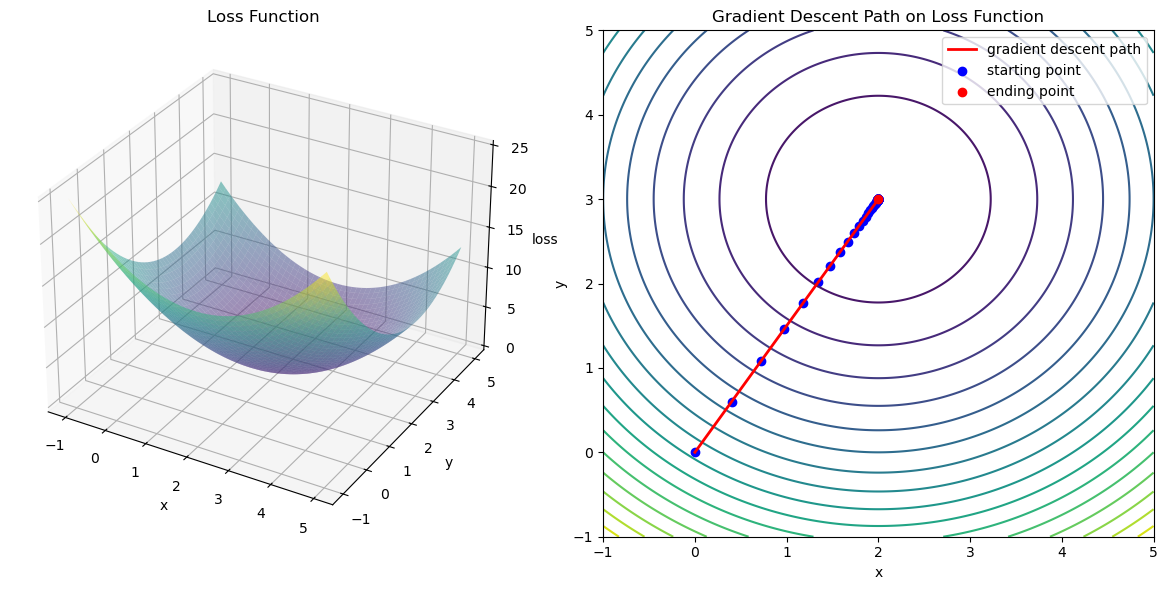

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def loss_func(_x, _y):
    return (_x - 2)**2 + (_y - 3)**2

def gradient(x, _y):
    dx = 2 * (x - 2)
    dy = 2 * (_y - 3)
    return dx, dy

def gradient_descent(_initial_point, _learning_rate, _n_iter):
    x, _y = _initial_point
    _trajectory = [(x, _y)]
    for _ in range(_n_iter):
        dx, dy = gradient(x, _y)
        x -= _learning_rate * dx
        _y -= _learning_rate * dy
        _trajectory.append((x, _y))
    return _trajectory

initial_point = (0, 0)
learning_rate = 0.1
n_iter = 100

trajectory = gradient_descent(initial_point, learning_rate, n_iter)
trajectory = np.array(trajectory)

x_vals = np.linspace(-1, 5, 400)
y_vals = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_func(X, Y)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax1.set_title('Loss Function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('loss')

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=20)
ax2.plot(trajectory[:, 0], trajectory[:, 1], 'r-', linewidth=2, label = 'gradient descent path')
ax2.scatter(trajectory[:, 0], trajectory[:, 1], color = 'blue', label = 'starting point')
ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], color = 'red', label = 'ending point')
ax2.set_title('Gradient Descent Path on Loss Function')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()

## Regression Example

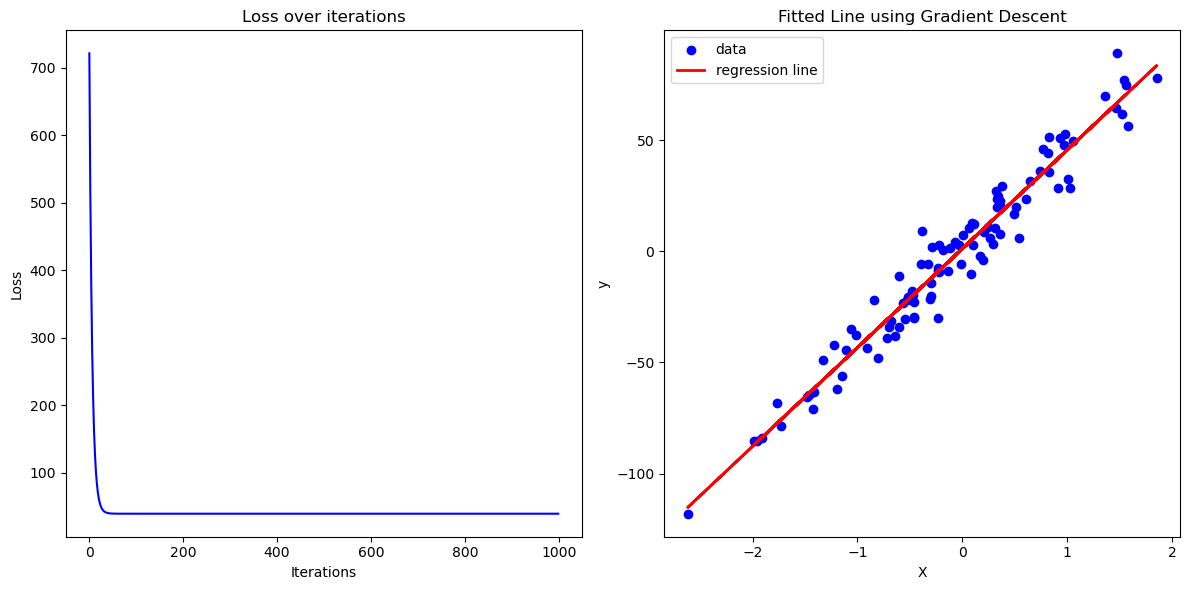

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.flatten()

def hypothesis(x, _theta: np.ndarray) -> np.ndarray:
    return _theta[0] + _theta[1] * x

def compute_loss(_x, _y, _theta):
    return np.mean((_y - hypothesis(_x, _theta)) ** 2) / 2

def compute_gradient(_x, _y, _theta):
    n = len(_y)
    pred = hypothesis(_x, _theta)
    grad_theta0 = -np.sum(_y - pred) / n
    grad_theta1 = -np.sum((_y - pred) * _x) / n
    return np.array([grad_theta0, grad_theta1])

def gradient_descent(_x, _y, _theta, _learning_rate, _n_iter) -> tuple:
    _loss_history = []
    for _ in range(_n_iter):
        grad = compute_gradient(_x, _y, _theta)
        _theta -= _learning_rate * grad
        loss = compute_loss(_x, _y, _theta)
        _loss_history.append(loss)
    return _theta, _loss_history

theta = np.array([0.0, 0.0])
learning_rate = 0.1
n_iter = 1000

optimal_theta, loss_history = gradient_descent(X, y, theta, learning_rate, n_iter)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(n_iter), loss_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='data')
plt.plot(X, hypothesis(X, optimal_theta), color='red', linewidth=2, label='regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Line using Gradient Descent')
plt.legend()
plt.tight_layout()
plt.show()

## Quartic Function with One Dimensional Gradient Descent

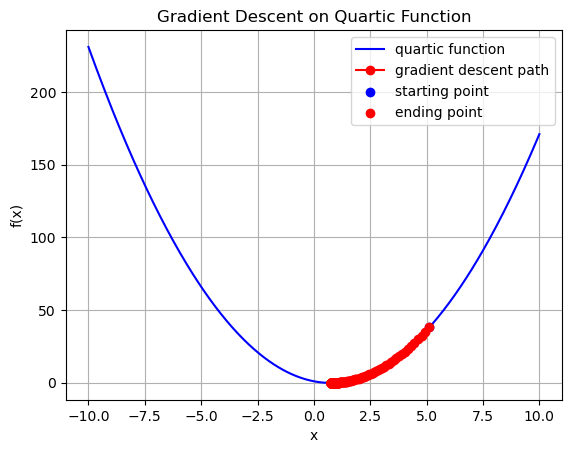

Starting point: 5.119534359882987
Optimal point: 0.7512436030161769
Optimal value: -0.12499690690307608


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def quartic_func(_x, _a, _b, _c):
    return _a * _x**2 + _b * _x + _c

def gradient(_x, _a, _b):
    dx = 2 * _a * _x + _b
    return dx

def gradient_descent(_initial_point, _a, _b, _c, _learning_rate, _n_iter):
    x = _initial_point
    _trajectory = [x]
    for _ in range(_n_iter):
        dx = gradient(x, _a, _b)
        x -= _learning_rate * dx
        _trajectory.append(x)
    return x, _trajectory

a = 2
b = -3
c = 1
initial_point = np.random.uniform(-10, 10)
learning_rate = 0.01
n_iter = 200

optimal_x, trajectory = gradient_descent(initial_point, a, b, c, learning_rate, n_iter)
optimal_y = quartic_func(optimal_x, a, b, c)

x_vals = np.linspace(-10, 10, 400)
y_vals = quartic_func(x_vals, a, b, c)

plt.plot(x_vals, y_vals, 'b-', label='quartic function')
plt.plot(trajectory, [quartic_func(x, a, b, c) for x in trajectory], 'ro-', label='gradient descent path')
plt.scatter(trajectory[0], quartic_func(trajectory[0], a, b, c), color='blue', label='starting point')
plt.scatter(optimal_x, optimal_y, color='red', label='ending point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on Quartic Function')
plt.legend()
plt.grid(True)
plt.show()

print(f'Starting point: {initial_point}')
print(f'Optimal point: {optimal_x}')
print(f'Optimal value: {optimal_y}')